# Segunda parte - Respostas das perguntas do teste

In [ ]:
# Pergunta 1 - Período de data no qual foram recebidas mais doações

In [86]:
import sqlite3
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np
from scipy import sparse


conn = sqlite3.connect("/home/matheus/Documents/AFILIO/dbAfilio.db")
cur = conn.cursor()
sql = "select ano, mes, sum(Valor_receita) from dataset group by ano, mes order by ano DESC, mes DESC, sum(Valor_receita)  DESC"

cur.execute(sql)
rows = cur.fetchall()

print("Ano, Mês, Dia, Valor Total de Receita por Mês")
print("")

vec_data = []
vec_valores = []

for row in rows[:10]:
    print(row)
    data = str([row[0]]) + str(row[1])
    vec_data.append(data)
    valor = row[2]
    vec_valores.append(float(valor))

Ano, Mês, Dia, Valor Total de Receita por Mês

(u'2014', u'12', 268433.20999999996)
(u'2014', u'11', 119205824.24999982)
(u'2014', u'10', 1272106499.7300067)
(u'2014', u'09', 1630688081.62003)
(u'2014', u'08', 991813402.5799927)
(u'2014', u'07', 377370377.1399991)
(u'2014', u'06', 43442.0)
(u'2014', u'05', 5000.0)
(u'2014', u'04', 6010.5)
(u'2014', u'01', 69867.52)


Período onde houveram as maiores doações:



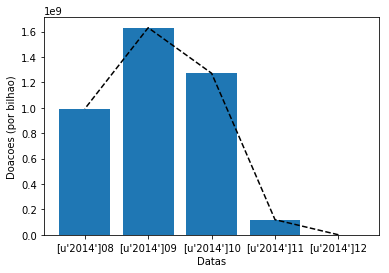

In [60]:
# A partir do resultado considero discrepante as 4 ultimas linhas dentre as primeiras, logo seleciono o período das 6 primeiras

print("Período onde houveram as maiores doações:")
print("")
fig, ax = plt.subplots()
ax.bar(vec_data[:5], vec_valores[:5])
ax.plot(vec_data[:5], vec_valores[:5], 'k--')
ax.set_ylabel('Doacoes (por bilhao)')
ax.set_xlabel('Datas')
plt.show()

In [ ]:
# Pergunta 2 - Partidos que receberam mais doações

In [73]:
conn = sqlite3.connect("/home/matheus/Documents/AFILIO/dbAfilio.db")
cur = conn.cursor()
sql = "select Sigla_Partido, sum(Valor_receita) from dataset group by Sigla_Partido order by sum(Valor_receita) DESC, Sigla_Partido ASC"

cur.execute(sql)
rows = cur.fetchall()

print("Sigla do Partido, Total recebido de doações:")
print("")

vec_partidos = []
vec_valores = []

for row in rows[:5]:
    print(row)
    partido = str([row[0]])
    vec_partidos.append(partido)
    valor = row[1]
    vec_valores.append(float(valor))

Sigla do Partido, Total recebido de doações:

(u'PT', 960108120.750003)
(u'PSDB', 737057695.7999969)
(u'PMDB', 675994781.4399992)
(u'PSB', 305117132.67)
(u'PSD', 242957150.63000128)


Partidos que receberam as maiores doações:



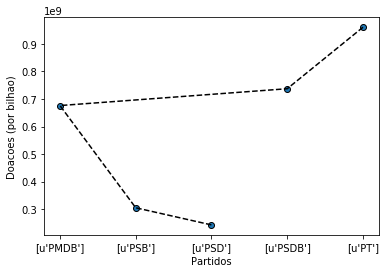

In [75]:
# Gráfico do resultado

print("Partidos que receberam as maiores doações:")
print("")

fig, ax = plt.subplots()
ax.scatter(vec_partidos, vec_valores, edgecolors=(0, 0, 0))
ax.plot(vec_partidos, vec_valores, 'k--')
ax.set_xlabel('Partidos')
ax.set_ylabel('Doacoes (por bilhao)')
plt.show()

In [ ]:
# Pergunta 3 - Filtrar os 10 Candidatos que receberam as maiores doações e medir a audiência no mês de jan/2018

In [77]:
# Primeiramente filtro os 10 canditados que mais receberam doações

conn = sqlite3.connect("/home/matheus/Documents/AFILIO/dbAfilio.db")
cur = conn.cursor()
sql = "select Nome_candidato, sum(Valor_receita) from dataset where ano = 2014 group by Nome_candidato order by sum(Valor_receita) DESC, Nome_candidato ASC"

cur.execute(sql)
rows = cur.fetchall()

print("Nome do Candidato, Total recebido de doações:")
print("")

vec_candidatos = []
vec_valores = []

for row in rows[:10]:
    print(row)
    candidato = str([row[0]])
    vec_candidatos.append(candidato)
    valor = row[1]
    vec_valores.append(float(valor))

Nome do Candidato, Total recebido de doações:

(u'DILMA VANA ROUSSEFF', 350493401.7000004)
(u'A\xef\xbf\xbdCIO NEVES DA CUNHA', 226858146.73000005)
(u'FERNANDO DAMATA PIMENTEL', 53413190.02999995)
(u'EUN\xef\xbf\xbdCIO LOPES DE OLIVEIRA', 49286252.06)
(u'LUIZ FERNANDO DE SOUZA', 45150556.489999995)
(u'MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA', 43949282.06999999)
(u'JO\xef\xbf\xbdO PIMENTA DA VEIGA FILHO', 40398648.889999956)
(u'GERALDO JOSE RODRIGUES ALCKMIN FILHO', 40394953.029999994)
(u'CAMILO SOBREIRA DE SANTANA', 39921772.68)
(u'RUI COSTA DOS SANTOS', 32196722.64)


In [ ]:
# Pergunta 4 - Quais segmentos de negócio doaram mais e para quais partidos

In [4]:
# Primeiro obtenho os segmentos de negócio que mais doaram. Optei por obter os 10 maiores.

conn = sqlite3.connect("/home/matheus/Documents/AFILIO/dbAfilio.db")
cur = conn.cursor()
sql = "select Cod_setor_doador, Setor_doador_str, sum(Valor_receita) from dataset where  Cod_setor_doador is not null group by Cod_setor_doador order by sum(Valor_receita) DESC, Setor_doador_str ASC LIMIT 10"

cur.execute(sql)
rows = cur.fetchall()

print("Código do Setor, Nome do Setor, Total doado pelo setor")
print("")

vet_cod_setor = []

for row in rows:
    print(row)
    vet_cod_setor.append(row[0])

Código do Setor, Nome do Setor, Total doado pelo setor

(9492800.0, u'Atividades de organiza\xef\xbf\xbd\xef\xbf\xbdes pol\xef\xbf\xbdticas', 2210125894.820191)
(4211101.0, u'Constru\xef\xbf\xbd\xef\xbf\xbdo de rodovias e ferrovias', 83555002.40999994)
(1011201.0, u'Frigor\xef\xbf\xbdfico - abate de bovinos', 80002097.28)
(4120400.0, u'Constru\xef\xbf\xbd\xef\xbf\xbdo de edif\xef\xbf\xbdcios', 65680958.24000002)
(6422100.0, u'Bancos m\xef\xbf\xbdltiplos, com carteira comercial', 47882846.599999994)
(4110700.0, u'Incorpora\xef\xbf\xbd\xef\xbf\xbdo de empreendimentos imobili\xef\xbf\xbdrios', 35134793.58)
(4299599.0, u'Outras obras de engenharia civil n\xef\xbf\xbdo especificadas anteriormente', 33859383.0)
(1113502.0, u'Fabrica\xef\xbf\xbd\xef\xbf\xbdo de cervejas e chopes', 27970815.0)
(4731800.0, u'Com\xef\xbf\xbdrcio varejista de combust\xef\xbf\xbdveis para ve\xef\xbf\xbdculos automotores', 25151470.51)
(9430800.0, u'Atividades de associa\xef\xbf\xbd\xef\xbf\xbdes de defesa de direi

In [100]:
# Agora eu obtenho os partidos que receberam as doações por setor concluindo a pergunta completa:

conn = sqlite3.connect("/home/matheus/Documents/AFILIO/dbAfilio.db")
cur = conn.cursor()
sql = "select distinct Sigla_Partido, Cod_setor_doador, Setor_doador_str from dataset" + \
" where  Cod_setor_doador is not null and  Cod_setor_doador in " + \
" (9492800.0, 4211101.0, 1011201.0, 4120400.0, 6422100.0, 4110700.0, 4299599.0, 1113502.0, 4731800.0, 9430800.0)" + \
" group by Sigla_Partido, Cod_setor_doador order by Sigla_Partido ASC"

cur.execute(sql)
rows = cur.fetchall()

print("Código do partido, Código do Setor, Nome do Setor")
print("")

set_partido_setor = {}

for row in rows:
    print(row)
    
# OBS: Nessa etapa da solução eu criei em desenvolvimento um gráfico onde este ficou extremamente confuso.
# A quantidade de dados que ele tinha que representar ficou visualmente ruim ao não caber de forma clara,
# ainda que testado diversos tipos de gráfico.
# Considero melhor exibir os dados do que incluir um gráfico que não adiciona valor a solução somente pode confundir.
# Abaixo segue um adicional da mesma solução usando numpy, pandas, e scipy que retornam o resultado de forma a 
# permitir implmentações diversas a partir dele numéricamente.

Código do partido, Código do Setor, Nome do Setor

(u'DEM', 1011201.0, u'Frigor\xef\xbf\xbdfico - abate de bovinos')
(u'DEM', 1113502.0, u'Fabrica\xef\xbf\xbd\xef\xbf\xbdo de cervejas e chopes')
(u'DEM', 4110700.0, u'Incorpora\xef\xbf\xbd\xef\xbf\xbdo de empreendimentos imobili\xef\xbf\xbdrios')
(u'DEM', 4120400.0, u'Constru\xef\xbf\xbd\xef\xbf\xbdo de edif\xef\xbf\xbdcios')
(u'DEM', 4211101.0, u'Constru\xef\xbf\xbd\xef\xbf\xbdo de rodovias e ferrovias')
(u'DEM', 4299599.0, u'Outras obras de engenharia civil n\xef\xbf\xbdo especificadas anteriormente')
(u'DEM', 4731800.0, u'Com\xef\xbf\xbdrcio varejista de combust\xef\xbf\xbdveis para ve\xef\xbf\xbdculos automotores')
(u'DEM', 6422100.0, u'Bancos m\xef\xbf\xbdltiplos, com carteira comercial')
(u'DEM', 9430800.0, u'Atividades de associa\xef\xbf\xbd\xef\xbf\xbdes de defesa de direitos sociais')
(u'DEM', 9492800.0, u'Atividades de organiza\xef\xbf\xbd\xef\xbf\xbdes pol\xef\xbf\xbdticas')
(u'PC do B', 1113502.0, u'Fabrica\xef\xbf\xbd\xef\x

In [ ]:
# Continuação da solução:
# Como foi indicado o uso do numpy para resolver o problema, como demonstração criarei uma matriz esparsa que
# representa os setores no eixo y e os partidos no eixo x, onde marcarei como 1 quando o setor investiu no partido e
# quando não tem a relação do setor e partido será nulo e para fins de memória usarei uma matriz esparsa condensada
# onde só contém as relações que existem. Essa matriz pode ser usada para inúmeros fins, para citar um, pode-se recomendar
# um partido para um setor, ou recomendar um setor para um partido.
# Não pretendo implementar as recomendações mas demonstrar a criação da matriz para a finalidade do teste

In [101]:
conn = sqlite3.connect("/home/matheus/Documents/AFILIO/dbAfilio.db")
cur = conn.cursor()
sql = "select distinct Cod_setor_doador, Sigla_Partido, 1 from dataset" + \
" where  Cod_setor_doador is not null and  Cod_setor_doador in " + \
" (9492800.0, 4211101.0, 1011201.0, 4120400.0, 6422100.0, 4110700.0, 4299599.0, 1113502.0, 4731800.0, 9430800.0)" + \
" group by Sigla_Partido, Cod_setor_doador order by Cod_setor_doador ASC, Sigla_Partido ASC"

cur.execute(sql)

listacfromdb = list(cur.fetchall())

df = pd.DataFrame.from_records(listacfromdb, columns=['Cod_setor_doador', 'Sigla_Partido', 'investiu'])

# Mantém uma cópia dos valores em forma de texto para identificação ser possível,
# pois irei transformar os dados em índices numéricos que não informam quando puros os valores textuais iniciais 
# impossibilitando interpretações. 
# É preciso transformar os textos em números para a construção da matriz que não lida com texto.
df['setor_str'] = df['Cod_setor_doador']
df['partido_str'] = df['Sigla_Partido']
# OBS: Não serão usadas aqui, é somente uma demonstração de como manter o texto original pelos índices numéricos

# Transforma o setor e partido de texto para índices numéricos
df['Cod_setor_doador'] = pd.Series(df['Cod_setor_doador']).astype('category').cat.codes.astype('int')
df['Sigla_Partido'] = pd.Series(df['Sigla_Partido']).astype('category').cat.codes.astype('int')

# Deixa uma cópia dos dados em forma de texto
dn = df.copy()
dn = dn.drop('setor_str', 1)
dn = dn.drop('partido_str', 1)

# Converte os dados do Pandas Dataframe em um numpy array
rows = dn.to_records(index=False)
nparray = np.fromiter(rows, dtype=[('setor_str', int), ('partido_str', int), ('investiu', int)])

# Cria a matriz esparsa final pronta para ser utilizada em problemas de Machine Learning
sparse_matrix = sparse.csr_matrix((nparray['investiu'], (nparray['setor_str'], nparray['partido_str'])))

print("Matriz esparsa condensada representativa da relação de setores e partidos com doação:")
print(sparse_matrix)
print("")

Matriz esparsa condensada representativa da relação de setores e partidos com doação:
  (0, 0)	1
  (0, 4)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 25)	1
  (0, 27)	1
  (0, 29)	1
  (0, 30)	1
  (0, 31)	1
  (1, 0)	1
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (1, 7)	1
  (1, 9)	1
  (1, 11)	1
  (1, 17)	1
  :	:
  (9, 7)	1
  (9, 8)	1
  (9, 9)	1
  (9, 10)	1
  (9, 11)	1
  (9, 12)	1
  (9, 13)	1
  (9, 14)	1
  (9, 15)	1
  (9, 16)	1
  (9, 17)	1
  (9, 18)	1
  (9, 19)	1
  (9, 20)	1
  (9, 21)	1
  (9, 22)	1
  (9, 23)	1
  (9, 24)	1
  (9, 25)	1
  (9, 26)	1
  (9, 27)	1
  (9, 28)	1
  (9, 29)	1
  (9, 30)	1
  (9, 31)	1



In [ ]:
# Pergunta 5 - 
# Árvores de decisão que fazem sentido para o problema:

# 1- Em qual Candidato investir?
# 2 - Em qual partido investir?
# 3- Para qual segmento pedir doações?
# ...

# Para a tarefa em questão foi pedida uma árvore de decisão a partir dos dados
# Por escolha de uma árvore que se mostra mais importante baseado em uma suposição de útilidade optei por uma árvore
# de classificação para responder a uma pergunta.
# Irei implementar uma árvore que dados atributos do dataset escolha um partido para efetuar doação.
# Nesse caso também irei filtrar os atributos que podem influenciar nessa decisão,
# excluindo certos atributos que considero não ajudar ou ainda invalidar o Modelo.

# Primeiro passo: Obter os atributos necessários e o target separando os dois em conjuntos de dados diferentes.
# Considero importante os dados que não indicam candidato pois senão o partido já está considerado, seria um erro.
# Considero a eleição, prestador de contas, doador, setor do doador e o valor que ele quer investir.
# Com esses atributos minha intuição é que sejam o suficiente para sugerir um partido para doar.

In [83]:
# Treino do Modelo:
conn = sqlite3.connect("/home/matheus/Documents/AFILIO/dbAfilio.db")
cur = conn.cursor()
sql = 'select "Sigla_Partido", "Cï¿½d. Eleiï¿½ï¿½o", "CNPJ Prestador Conta", "CPF/CNPJ do doador", "Cod_setor_doador", Valor_receita from dataset where "CPF/CNPJ do doador" is not null and "CNPJ Prestador Conta" is not null and Valor_receita is not null and "Cod_setor_doador" is not null'

cur.execute(sql)
rows = cur.fetchall()

vec_atributos = []
vec_target = []

for row in rows:
    vec_target.append(row[0])
    atributos = [row[1], row[2], row[3], row[4], row[5]]
    vec_atributos.append(atributos)
    
# o classificador encontra padrões nos dados de treinamento
clf = tree.DecisionTreeClassifier() # instância do classificador
clf = clf.fit(vec_atributos, vec_target) # fit encontra padrões nos dados

In [103]:
# Predição:
# Somente para conferir se o Modelo foi bem construído, testei um exemplo do dataset e como resultado ele acertou o partido
# Concluo então que a árvore parece estar funcionando adequadamente.

print("Predição a partir do Modelo utilizando o primeiro exemplo do dataset: ")
print("")
print(clf.predict([[143, 20578194000114, 1256007000131.0, 4511101.0, 145000.0]]))

#OBS: Essa não é a melhor maneira de checar o Modelo criado. Eu precisaria dividir os dados em subconjuntos
# de treino e teste e usar o teste para checar se funciona. Foi apenas uma simples verificação da corretude da árvore.



Predição a partir do Modelo utilizando o primeiro exemplo do dataset: 

[u'PSDB']


In [ ]:
# Conclusão: O exercício foi executado como pedido 
# Explicado cada passo contendo o código, o resultado e minhas observações.
# Espero que eu tenha entendido completamente todos os requisitos e implementado de uma forma clara.
# Qualquer dúvida estou a disposição para responder.
# Obrigado!